In [1]:
import numpy as np
import pylab

def f(x):
    return (3*x[0]-np.cos(x[1]*x[2])-1/2)**2+(x[0]**2-81*(x[1]+0.1)**2+np.sin(x[2])+1.06)**2+(np.exp(-x[0]*x[1])+20*x[2]+(10*np.pi-3)/3)**2

def calculate_gradient_vector(x):
    # Partial derivatives of the objective function
    df_dx0 = 6*(3*x[0]-np.cos(x[1]*x[2])-1/2)+4*x[0]*(x[0]**2-81*(x[1]+0.1)**2+np.sin(x[2])+1.06)+2*(np.exp(-x[0]*x[1])+20*x[2]+(10*np.pi-3)/3)*np.exp(-x[0]*x[1])*(-x[1])
    df_dx1 = 2*(3*x[0]-np.cos(x[1]*x[2])-1/2)*np.sin(x[1]*x[2])*x[2]+2*(x[0]**2-81*(x[1]+0.1)**2+np.sin(x[2])+1.06)*(-192*(x[1]+0.1))+2*(np.exp(-x[0]*x[1])+20*x[2]+(10*np.pi-3)/3)*np.exp(-x[0]*x[1])*(-x[0])
    df_dx2 = 2*(3*x[0]-np.cos(x[1]*x[2])-1/2)*np.sin(x[1]*x[2])*x[1]+2*(x[0]**2-81*(x[1]+0.1)**2+np.sin(x[2])+1.06)*np.cos(x[2])+2*(np.exp(-x[0]*x[1])+20*x[2]+(10*np.pi-3)/3)*20
    return np.array([df_dx0, df_dx1, df_dx2])

In [3]:
data_points = np.array([[1, 2], [3, 3], [4, 4], [7, 5]])

def f(x):
    # Objective function (sum of squares of residuals)
    residuals = data_points[:, 1] - (x[0] * data_points[:, 0] + x[1])
    return np.sum(residuals**2)

def calculate_gradient_vector(x):
    df_dx0 = -2 * np.sum((data_points[:, 1] - (x[0] * data_points[:, 0] + x[1])) * data_points[:, 0])
    df_dx1 = -2 * np.sum(data_points[:, 1] - (x[0] * data_points[:, 0] + x[1]))
    return np.array([df_dx0, df_dx1])

In [4]:
def steepest_descent(n, x, TOL, N):
    k = 1
    while k <= N:
        g1 = f(x)
        z = calculate_gradient_vector(x)
        z0 = np.linalg.norm(z, 2)
        
        if z0 == 0:
            print("Zero gradient")
            return x, g1
        
        z = z / z0  # Make z a unit vector
        alpha3 = 1
        g3 = f(x - alpha3 * z)
        
        while g3 >= g1:
            alpha3 = alpha3 / 2
            g3 = f(x - alpha3 * z)
            
            if alpha3 < TOL / 2:
                print("No likely improvement")
                return x, g1
        alpha2 = alpha3 / 2
        g2 = f(x - alpha2 * z)
        h1 = (g2 - g1) / alpha2
        h2 = (g3 - g2) / (alpha3 - alpha2)
        h3 = (h2 - h1) / alpha3
        alpha0 = 0.5 * (alpha2 - h1 / h3)
        g0 = f(x - alpha0 * z)
        
        if g0 < np.minimum(g1, g3):
            alpha = alpha0
            g = g0
        else:
            alpha = alpha3
            g = g3
        x = x - alpha * z
        
        if abs(g - g1) < TOL:
            print("Success")
            return x, g
        k += 1
    print("Maximum iterations exceeded")
    return x, g1

# Example usage:
n = 2  # Number of variables
x_initial = np.array([1, 0])  # Initial approximation
tolerance = 0.001  # Adjust the tolerance for higher precision
max_iterations = 100  # Maximum number of iterations

result, final_gradient = steepest_descent(n, x_initial, tolerance, max_iterations)
print("Final result:", result)
print("Final gradient:", final_gradient)

Success
Final result: [0.51332189 1.57841551]
Final gradient: 0.18754263771431212


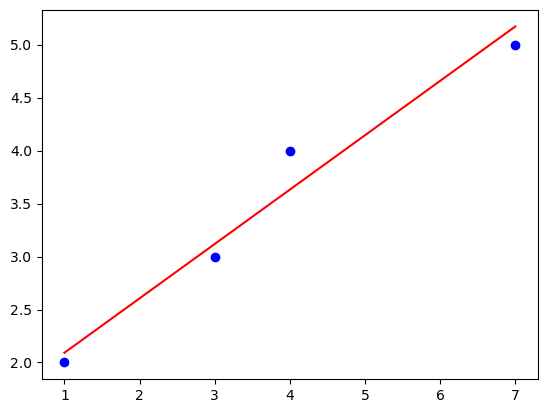

In [38]:
x_values = data_points[:, 0]
y_values = data_points[:, 1]
line_values = [result[0] * x + result[1] for x in x_values]
pylab.plot(x_values, y_values, 'ob', x_values, line_values, 'r')